# Dimensionality reduction using truncated SVD (aka LSA)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
iris = load_iris()

In [3]:
iris_data = iris.data
iris_target = iris.target

In [4]:
df = pd.DataFrame(iris_data, columns=['c1','c2','c3','c4'])
df['class'] = iris_target
df.sample(4)

,c1,c2,c3,c4,class
128,6.4,2.8,5.6,2.1,2
106,4.9,2.5,4.5,1.7,2
131,7.9,3.8,6.4,2.0,2
42,4.4,3.2,1.3,0.2,0


## LSA n_components = 3

In [5]:
df = pd.DataFrame(iris_data, columns=['c1','c2','c3','c4'])
df['class'] = iris_target

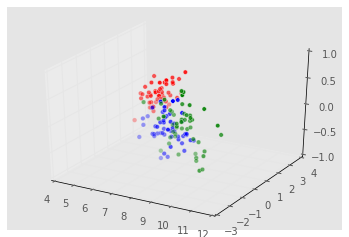

In [6]:
svd = TruncatedSVD(3)
iris_transformed = svd.fit_transform(iris_data)
df = pd.DataFrame(iris_transformed,columns=['c1','c2','c3'])
df['class'] = iris_target
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df[df['class']==0]['c1'], ys=df[df['class']==0]['c2'], zs=df[df['class']==0]['c3'], c='red')
ax.scatter(xs=df[df['class']==1]['c1'], ys=df[df['class']==1]['c2'], zs=df[df['class']==1]['c3'], c='blue')
ax.scatter(xs=df[df['class']==2]['c1'], ys=df[df['class']==2]['c2'], zs=df[df['class']==2]['c3'], c='green')

## LSA n_components = 2

In [7]:
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)

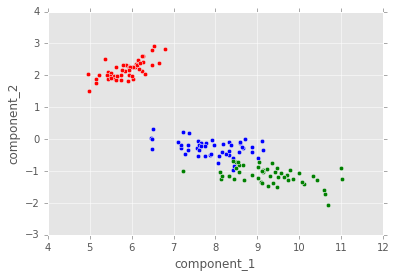

In [8]:
df = pd.DataFrame(iris_transformed,columns=['component_1','component_2'])
df['class'] = iris_target
ax = df[df['class']==0].plot.scatter(x='component_1', y='component_2', c='red');
df[df['class']==1].plot.scatter(x='component_1', y='component_2', c='blue', ax=ax);
df[df['class']==2].plot.scatter(x='component_1', y='component_2', c='green', ax=ax);

## LSA n_components = 1

In [9]:
svd = TruncatedSVD(1)
iris_transformed = svd.fit_transform(iris_data)

In [10]:
df = pd.DataFrame(iris_transformed, columns=['component_1'])
df['component_2'] = 1
df['class'] = iris_target

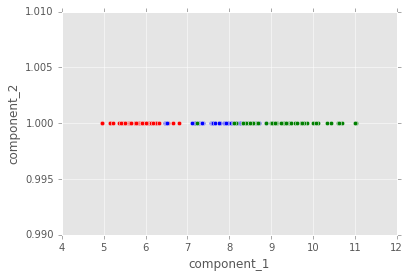

In [11]:
ax = df[df['class']==0].plot.scatter(x='component_1', y='component_2', c='red');
df[df['class']==1].plot.scatter(x='component_1', y='component_2', c='blue', ax=ax);
df[df['class']==2].plot.scatter(x='component_1', y='component_2', c='green', ax=ax);